In [1]:
import numpy as np
import pandas as pd
import NotebookLoader
from PrepareData import load_stars, load_comet

importing Jupyter notebook from PrepareData.ipynb
PrepareData v1.04 26.07.2020


In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

In [9]:
(x_train, y_train), (x_test, y_test), (mean, std) = load_stars()

In [13]:
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [14]:
model.fit(x_train, y_train, epochs=200, batch_size=1, verbose=1, validation_split=0.2)

Train on 24 samples, validate on 6 samples
Epoch 1/200
24/24 [==============================] - 0s 20ms/sample - loss: 0.8868 - mean_absolute_error: 0.8185 - val_loss: 0.5064 - val_mean_absolute_error: 0.5939
Epoch 2/200
24/24 [==============================] - 0s 4ms/sample - loss: 0.4048 - mean_absolute_error: 0.5375 - val_loss: 0.3653 - val_mean_absolute_error: 0.5221
Epoch 3/200
24/24 [==============================] - 0s 6ms/sample - loss: 0.1606 - mean_absolute_error: 0.3236 - val_loss: 0.3129 - val_mean_absolute_error: 0.4146
Epoch 4/200
24/24 [==============================] - 0s 7ms/sample - loss: 0.0871 - mean_absolute_error: 0.2354 - val_loss: 0.3340 - val_mean_absolute_error: 0.3449
Epoch 5/200
24/24 [==============================] - 0s 4ms/sample - loss: 0.0672 - mean_absolute_error: 0.1959 - val_loss: 0.3318 - val_mean_absolute_error: 0.3231
Epoch 6/200
24/24 [==============================] - 0s 7ms/sample - loss: 0.0529 - mean_absolute_error: 0.1692 - val_loss: 0.2814 

24/24 [==============================] - 0s 5ms/sample - loss: 0.0021 - mean_absolute_error: 0.0311 - val_loss: 0.0551 - val_mean_absolute_error: 0.1148
Epoch 51/200
24/24 [==============================] - 0s 5ms/sample - loss: 0.0023 - mean_absolute_error: 0.0319 - val_loss: 0.0504 - val_mean_absolute_error: 0.1089
Epoch 52/200
24/24 [==============================] - 0s 3ms/sample - loss: 0.0020 - mean_absolute_error: 0.0311 - val_loss: 0.0472 - val_mean_absolute_error: 0.1103
Epoch 53/200
24/24 [==============================] - 0s 6ms/sample - loss: 0.0021 - mean_absolute_error: 0.0325 - val_loss: 0.0619 - val_mean_absolute_error: 0.1206
Epoch 54/200
24/24 [==============================] - 0s 9ms/sample - loss: 0.0021 - mean_absolute_error: 0.0307 - val_loss: 0.0405 - val_mean_absolute_error: 0.1025
Epoch 55/200
24/24 [==============================] - 0s 5ms/sample - loss: 0.0017 - mean_absolute_error: 0.0292 - val_loss: 0.0533 - val_mean_absolute_error: 0.1209
Epoch 56/200
24/2

Epoch 99/200
24/24 [==============================] - 0s 15ms/sample - loss: 4.5038e-04 - mean_absolute_error: 0.0161 - val_loss: 0.0371 - val_mean_absolute_error: 0.0978
Epoch 100/200
24/24 [==============================] - 0s 7ms/sample - loss: 3.8012e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0321 - val_mean_absolute_error: 0.0893
Epoch 101/200
24/24 [==============================] - 0s 5ms/sample - loss: 4.2568e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0277 - val_mean_absolute_error: 0.0851
Epoch 102/200
24/24 [==============================] - 0s 4ms/sample - loss: 2.9593e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0347 - val_mean_absolute_error: 0.0993
Epoch 103/200
24/24 [==============================] - 0s 15ms/sample - loss: 4.1702e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0375 - val_mean_absolute_error: 0.0961
Epoch 104/200
24/24 [==============================] - 0s 3ms/sample - loss: 5.0515e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0296 - val_m

24/24 [==============================] - 0s 4ms/sample - loss: 4.1975e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0247 - val_mean_absolute_error: 0.0913
Epoch 148/200
24/24 [==============================] - 0s 3ms/sample - loss: 2.6680e-04 - mean_absolute_error: 0.0133 - val_loss: 0.0233 - val_mean_absolute_error: 0.0829
Epoch 149/200
24/24 [==============================] - 0s 5ms/sample - loss: 2.0030e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0200 - val_mean_absolute_error: 0.0755
Epoch 150/200
24/24 [==============================] - 0s 8ms/sample - loss: 3.5413e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0190 - val_mean_absolute_error: 0.0764
Epoch 151/200
24/24 [==============================] - 0s 3ms/sample - loss: 1.8857e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0181 - val_mean_absolute_error: 0.0769
Epoch 152/200
24/24 [==============================] - 0s 4ms/sample - loss: 3.1321e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0220 - val_mean_absolute_er

24/24 [==============================] - 0s 4ms/sample - loss: 0.0026 - mean_absolute_error: 0.0370 - val_loss: 0.0278 - val_mean_absolute_error: 0.1206
Epoch 196/200
24/24 [==============================] - 0s 3ms/sample - loss: 0.0014 - mean_absolute_error: 0.0273 - val_loss: 0.0209 - val_mean_absolute_error: 0.0810
Epoch 197/200
24/24 [==============================] - 0s 5ms/sample - loss: 9.2508e-04 - mean_absolute_error: 0.0249 - val_loss: 0.0135 - val_mean_absolute_error: 0.0707
Epoch 198/200
24/24 [==============================] - 0s 4ms/sample - loss: 8.4429e-04 - mean_absolute_error: 0.0230 - val_loss: 0.0055 - val_mean_absolute_error: 0.0565
Epoch 199/200
24/24 [==============================] - 0s 6ms/sample - loss: 0.0034 - mean_absolute_error: 0.0467 - val_loss: 0.0166 - val_mean_absolute_error: 0.0752
Epoch 200/200
24/24 [==============================] - 0s 4ms/sample - loss: 0.0031 - mean_absolute_error: 0.0419 - val_loss: 0.0142 - val_mean_absolute_error: 0.0799


In [15]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print(mse, mae)

0.006986094638705254 0.06448715


In [ ]:
prediction = model.predict(x_test)

In [15]:
model.evaluate(x_test, y_test, verbose=0)

[0.07544440776109695, 0.1854756623506546]

In [17]:
x_comet = load_comet(mean, std)

In [18]:
x_comet

array([[1.4863395329075222, 0.7490506360740669],
       [1.4485753693424712, 0.5859509007998749],
       [1.4072146187712251, 0.4160553432225916],
       [1.360458987690686, 0.2665472525545823],
       [1.308308476100854, 0.12383498418966431],
       [1.250763084001729, -0.018877284175253656],
       [1.187822811393311, -0.14799790793398895],
       [1.1176893647725024, -0.25673106478345026],
       [1.0421610376424006, -0.35866839932982025],
       [0.9630361235061038, -0.4470140892700076],
       [0.873121448351221, -0.5285639569071036],
       [0.7814084796932405, -0.5897263576349255],
       [0.6807040435197717, -0.6440929360596561],
       [0.5728064333339122, -0.6848678698782041],
       [0.46131223614185746, -0.7052553367874782],
       [0.34262486493741207, -0.7256428036967522],
       [0.21854261322367372, -0.7256428036967522],
       [0.09086377450374006, -0.7120511590905695],
       [-0.024227009694510013, -0.6916636921812955],
       [-0.17888025096090854, -0.65768458066583

In [21]:
y_comet = model.predict(x_comet)

In [23]:
import math
rads = (y_comet*std[2:4] + mean[2:4])*180./math.pi

In [24]:
rads

array([[26.85147880096451, 85.43203058366232],
       [28.299162728776732, 85.89889301355646],
       [29.812280208988362, 86.37888038084661],
       [31.295886830190028, 87.05738695139866],
       [32.791384722946376, 87.97348183858296],
       [34.32918250571089, 88.94903514580649],
       [35.867400046820535, 90.12990543263248],
       [37.37821369900605, 91.6670475797031],
       [38.908537454799976, 93.40881083933063],
       [40.37818531499399, 95.38006944162758],
       [41.8453551641261, 97.73547883187122],
       [43.14133544972623, 100.48604014514527],
       [44.45426771201514, 103.90436432447095],
       [45.654081771267315, 108.28351798836066],
       [46.606098829545026, 112.98211686084636],
       [47.29948009006851, 118.0613107613468],
       [47.69073694619573, 123.29705765208823],
       [47.879547123487015, 128.52695604176506],
       [47.882130330711206, 132.98256055536896],
       [47.61463650294028, 138.98685941346957],
       [46.921396872371865, 144.402089219748

In [25]:
from matplotlib import pyplot as plt

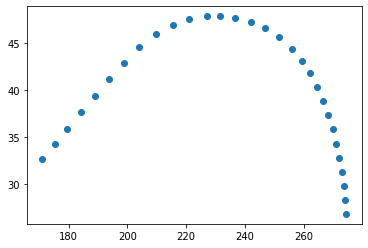

In [29]:
plt.scatter(360 - rads[:,1], rads[:,0])